In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df =  pd.read_csv(r"/kaggle/input/fraud-detection/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df.shape

(1296675, 23)

In [10]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
df.drop(columns=['Unnamed: 0','street','state','first','last','trans_num','unix_time'],inplace=True)

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   zip                    1296675 non-null  int64  
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [14]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [15]:
df[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [17]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour,day,month
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,0,Tuesday,1
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,0,Tuesday,1
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,0,Tuesday,1
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,0,Tuesday,1
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,0,Tuesday,1


In [18]:
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))
df[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [19]:
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age_cust'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,Tuesday,1,31
1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,Tuesday,1,41
2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,Tuesday,1,57
3,2019-01-01 00:01:16,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,Tuesday,1,52
4,2019-01-01 00:03:06,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,Tuesday,1,33


In [20]:
df['lat_dist'] = abs(round(df['merch_lat']-df['lat'],2))
df['long_dist'] = abs(round(df['merch_long']-df['long'],2))
df.drop(columns=['lat','long','merch_lat','merch_long','trans_date_trans_time'],inplace=True)
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age_cust,lat_dist,long_dist
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,0,Tuesday,1,31,0.07,0.87
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,0,Tuesday,1,41,0.27,0.02
2,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,0,0,Tuesday,1,57,0.97,0.11
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,0,0,Tuesday,1,52,0.80,0.45
4,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,0,0,Tuesday,1,33,0.25,0.83


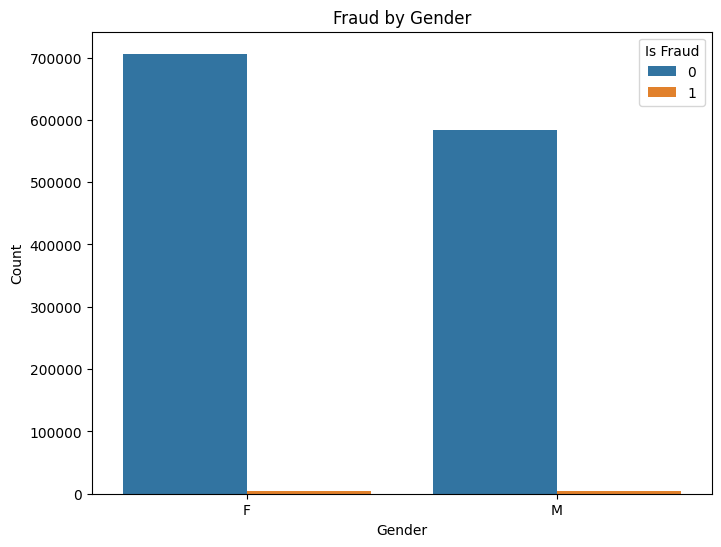

In [21]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'gender', hue ='is_fraud', data = df)
plt.title('Fraud by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title = 'Is Fraud')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Rau and Sons'),
  Text(1, 0, 'Cormier LLC'),
  Text(2, 0, 'Kozey-Boehm'),
  Text(3, 0, 'Doyle Ltd'),
  Text(4, 0, 'Kilback LLC'),
  Text(5, 0, 'Vandervort-Funk'),
  Text(6, 0, 'Kuhn LLC'),
  Text(7, 0, 'Padberg-Welch'),
  Text(8, 0, 'Terry-Huel'),
  Text(9, 0, 'Goyette Inc')])

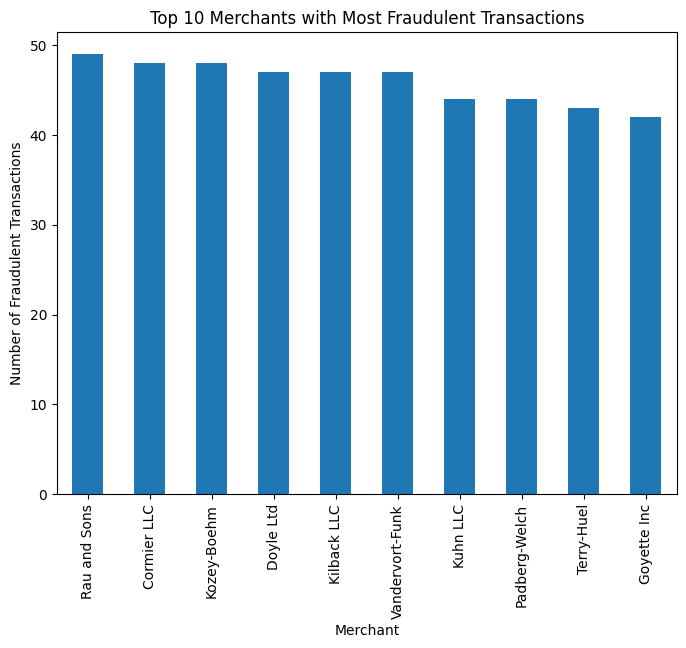

In [22]:
fraud_count_merch = df.groupby("merchant")["is_fraud"].sum()
top10_merch = fraud_count_merch.nlargest(10)
plt.figure(figsize=(8,6))
top10_merch.plot(kind="bar")
plt.xlabel("Merchant")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 Merchants with Most Fraudulent Transactions")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Houston'),
  Text(1, 0, 'Warren'),
  Text(2, 0, 'Huntsville'),
  Text(3, 0, 'Naples'),
  Text(4, 0, 'Dallas'),
  Text(5, 0, 'Topeka'),
  Text(6, 0, 'Tulsa'),
  Text(7, 0, 'Detroit'),
  Text(8, 0, 'Randolph'),
  Text(9, 0, 'San Antonio')])

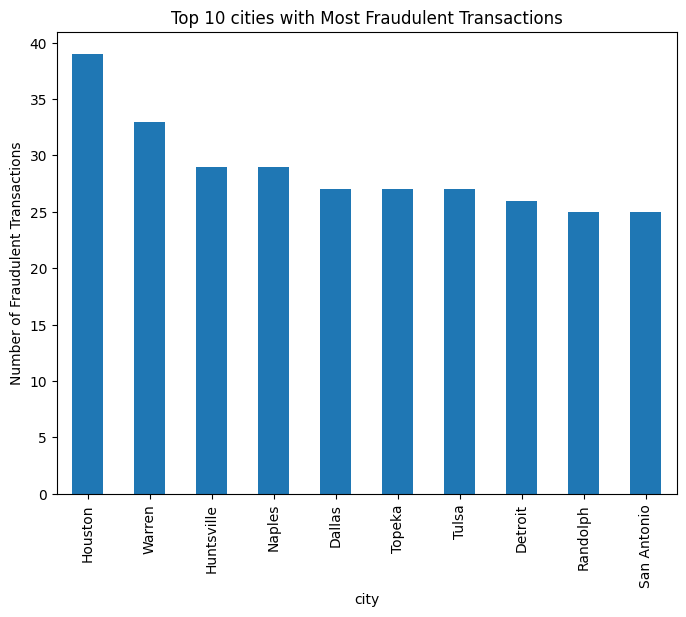

In [23]:
fraud_counts_city = df.groupby("city")["is_fraud"].sum()
plt.figure(figsize=(8,6))
fraud_counts_city.nlargest(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Top 10 cities with Most Fraudulent Transactions")
plt.xticks(rotation=90)

In [24]:
age_ranges = {
    "Child": (0, 13),
    "Teen": (13, 20),
    "Adult": (20, 65),
    "Senior": (65, None)}
df["age_group"] = np.where(df["age_cust"] < 13, "Child", np.where(df["age_cust"] < 20, "Teen", np.where(df["age_cust"] < 55, "Adult", "Senior")))
df["age_group"] = pd.cut(df["age_cust"], bins=[0, 13, 20, 55, 90], labels=["Child", "Teen", "Adult", "Senior"], include_lowest=True)
df.head()

,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,hour,day,month,age_cust,lat_dist,long_dist,age_group
0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,3495,"Psychologist, counselling",0,0,Tuesday,1,31,0.07,0.87,Adult
1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,149,Special educational needs teacher,0,0,Tuesday,1,41,0.27,0.02,Adult
2,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,83252,4154,Nature conservation officer,0,0,Tuesday,1,57,0.97,0.11,Senior
3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,1939,Patent attorney,0,0,Tuesday,1,52,0.80,0.45,Adult
4,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,99,Dance movement psychotherapist,0,0,Tuesday,1,33,0.25,0.83,Adult


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Adult'),
  Text(3, 0, 'Senior')])

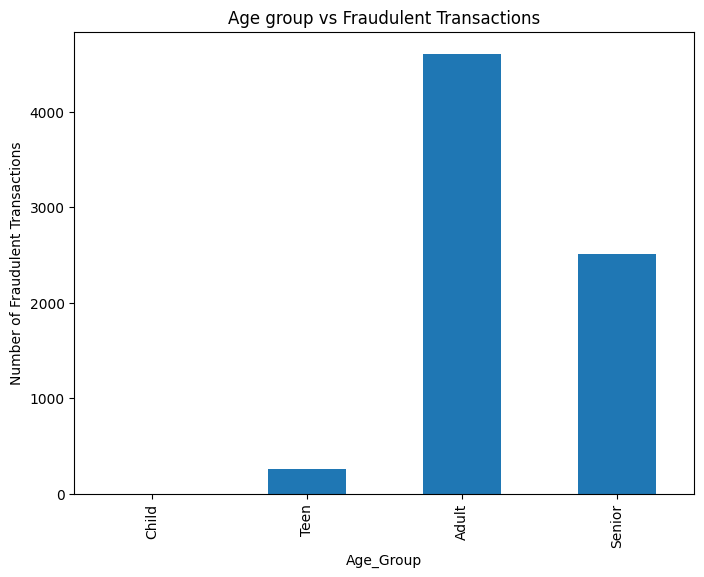

In [25]:
fraud_counts_age = df.groupby("age_group")["is_fraud"].sum()
plt.figure(figsize=(8,6))
fraud_counts_age.plot(kind="bar")
plt.xlabel("Age_Group")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Age group vs Fraudulent Transactions")
plt.xticks(rotation=90)

In [26]:
df.drop(columns=['merchant', 'job', 'category', 'city', 'day'],inplace=True)
dummies = pd.get_dummies(df, drop_first=True, dtype="int32",
        columns=["age_group", "gender"])
dummies


,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
0,2703186189652095,4.97,28654,3495,0,0,1,31,0.07,0.87,0,1,0,0
1,630423337322,107.23,99160,149,0,0,1,41,0.27,0.02,0,1,0,0
2,38859492057661,220.11,83252,4154,0,0,1,57,0.97,0.11,0,0,1,1
3,3534093764340240,45.00,59632,1939,0,0,1,52,0.80,0.45,0,1,0,1
4,375534208663984,41.96,24433,99,0,0,1,33,0.25,0.83,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,258,0,12,6,59,0.88,0.79,0,0,1,1
1296671,6011149206456997,51.70,21790,100,0,12,6,41,0.36,0.74,0,1,0,1
1296672,3514865930894695,105.93,88325,899,0,12,6,53,0.68,0.69,0,1,0,1
1296673,2720012583106919,74.90,57756,1126,0,12,6,40,0.56,0.70,0,1,0,1


In [27]:
new_df = dummies
new_df.tail()

,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
1296670,30263540414123,15.56,84735,258,0,12,6,59,0.88,0.79,0,0,1,1
1296671,6011149206456997,51.70,21790,100,0,12,6,41,0.36,0.74,0,1,0,1
1296672,3514865930894695,105.93,88325,899,0,12,6,53,0.68,0.69,0,1,0,1
1296673,2720012583106919,74.90,57756,1126,0,12,6,40,0.56,0.70,0,1,0,1
1296674,4292902571056973207,4.30,59871,218,0,12,6,25,0.72,0.31,0,1,0,1


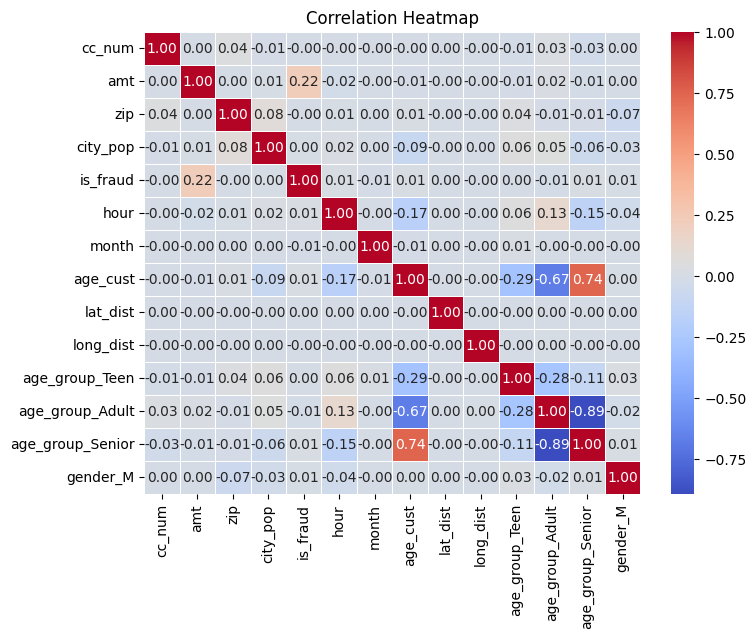

In [28]:
correlation_matrix = new_df.corr()

# Plotting a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [30]:
fraud_correlation = new_df.corr()['is_fraud'].abs().sort_values(ascending=False)
print(fraud_correlation)

is_fraud            1.000000
amt                 0.219404
age_group_Adult     0.014044
hour                0.013799
age_group_Senior    0.013672
age_cust            0.012453
month               0.012409
gender_M            0.007642
zip                 0.002162
city_pop            0.002136
cc_num              0.000981
lat_dist            0.000642
age_group_Teen      0.000615
long_dist           0.000183
Name: is_fraud, dtype: float64


In [31]:
zero = new_df[new_df["is_fraud"]==0]
one = new_df[new_df["is_fraud"]==1]
down = resample(zero, replace=False, n_samples=len(one))
down


,cc_num,amt,zip,city_pop,is_fraud,hour,month,age_cust,lat_dist,long_dist,age_group_Teen,age_group_Adult,age_group_Senior,gender_M
716423,3513618443244549,7.97,57340,355,0,13,11,64,0.54,0.29,0,0,1,0
698998,4736845434667908128,6.91,12910,2148,0,21,10,66,0.51,0.51,0,0,1,0
751185,4536996888716062123,9.07,87533,18408,0,14,11,47,0.59,0.46,0,1,0,1
296970,4334230547694630,130.06,83120,471,0,20,5,52,0.34,0.42,0,1,0,1
603001,2450829271795901,1.77,56379,16163,0,16,9,32,0.77,0.95,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815662,6011381817520024,37.71,82221,635,0,2,12,46,0.48,0.03,0,1,0,0
599694,3543591270174051,2.83,15920,922,0,20,9,47,0.08,0.78,0,1,0,0
1249557,4990494243023,16.87,21524,626,0,11,6,60,0.57,0.72,0,0,1,1
484823,4312133045694601139,74.39,21208,33917,0,4,7,42,0.26,0.16,0,1,0,1
